In [4]:
!gdown https://drive.google.com/uc?id=1MGhyeMngD6P9Kz9zJpL68ylQaIQvW7Zx
!unzip GTZAN.zip -d /content/GTZAN
!rm GTZAN.zip

Downloading...
From (original): https://drive.google.com/uc?id=1MGhyeMngD6P9Kz9zJpL68ylQaIQvW7Zx
From (redirected): https://drive.google.com/uc?id=1MGhyeMngD6P9Kz9zJpL68ylQaIQvW7Zx&confirm=t&uuid=3699fabc-83dc-4653-908b-7f3b4ac38817
To: /content/GTZAN.zip
100% 1.30G/1.30G [00:14<00:00, 91.7MB/s]
Archive:  GTZAN.zip
  inflating: /content/GTZAN/features_30_sec.csv  
  inflating: /content/GTZAN/features_3_sec.csv  
  inflating: /content/GTZAN/genres_original/blues/blues.00000.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00001.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00002.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00003.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00004.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00005.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00006.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00007.wav  
  inflating: /content/GTZAN/genres_origi

In [5]:
!rm -r /content/GTZAN/images_original
!rm /content/GTZAN/features_30_sec.csv
!rm /content/GTZAN/features_3_sec.csv

## 1. Trích xuất đặc trưng âm thanh - Tái tạo bộ dữ liệu GTZAN:

In [1]:
from glob import glob
import pandas as pd

In [2]:
num_segment = 10
num_mfcc = 20
sample_rate = 22050
n_fft = 2048
hop_length = 512

In [3]:
my_csv = {
    "filename": [],
    "chroma_stft_mean": [],
    "chroma_stft_var": [],
    "rms_mean": [],
    "rms_var": [],
    "spectral_centroid_mean": [],
    "spectral_centroid_var": [],
    "spectral_bandwidth_mean": [],
    "spectral_bandwidth_var": [],
    "rolloff_mean": [],
    "rolloff_var": [],
    "zero_crossing_rate_mean": [],
    "zero_crossing_rate_var": [],
    "harmony_mean": [],
    "harmony_var": [],
    "perceptr_mean": [],
    "perceptr_var": [],
    "tempo": [],
    "mfcc1_mean": [],
    "mfcc1_var": [],
    "mfcc2_mean": [],
    "mfcc2_var": [],
    "mfcc3_mean": [],
    "mfcc3_var": [],
    "mfcc4_mean": [],
    "mfcc4_var": [],
    "mfcc5_mean": [],
    "mfcc5_var": [],
    "mfcc6_mean": [],
    "mfcc6_var": [],
    "mfcc7_mean": [],
    "mfcc7_var": [],
    "mfcc8_mean": [],
    "mfcc8_var": [],
    "mfcc9_mean": [],
    "mfcc9_var": [],
    "mfcc10_mean": [],
    "mfcc10_var": [],
    "mfcc11_mean": [],
    "mfcc11_var": [],
    "mfcc12_mean": [],
    "mfcc12_var": [],
    "mfcc13_mean": [],
    "mfcc13_var": [],
    "mfcc14_mean": [],
    "mfcc14_var": [],
    "mfcc15_mean": [],
    "mfcc15_var": [],
    "mfcc16_mean": [],
    "mfcc16_var": [],
    "mfcc17_mean": [],
    "mfcc17_var": [],
    "mfcc18_mean": [],
    "mfcc18_var": [],
    "mfcc19_mean": [],
    "mfcc19_var": [],
    "mfcc20_mean": [],
    "mfcc20_var": [],
    "label": []
}

In [6]:
  import glob
import librosa
import librosa.display
import pandas as pd

dataset_path = "/content/GTZAN/genres_original"
audio_files = glob.glob(dataset_path + "/*/*")

samples_per_segment = int(sample_rate * 30 / num_segment)

genre = ""
for f in sorted(audio_files):
    if genre != f.split('/')[-2]:
        genre = f.split('/')[-2]
        print("Processing " + genre + "...")
    fname = f.split('/')[-1]
    try:
        y, sr = librosa.load(f, sr=sample_rate)
    except:
        continue

    for n in range(num_segment):
        y_seg = y[samples_per_segment * n: samples_per_segment * (n + 1)]

        # Chromagram
        chroma_hop_length = 512
        chromagram = librosa.feature.chroma_stft(y=y_seg, sr=sample_rate, hop_length=chroma_hop_length)
        my_csv["chroma_stft_mean"].append(chromagram.mean())
        my_csv["chroma_stft_var"].append(chromagram.var())

        # Root Mean Square Energy
        RMSEn = librosa.feature.rms(y=y_seg)
        my_csv["rms_mean"].append(RMSEn.mean())
        my_csv["rms_var"].append(RMSEn.var())

        # Spectral Centroid
        spec_cent = librosa.feature.spectral_centroid(y=y_seg)
        my_csv["spectral_centroid_mean"].append(spec_cent.mean())
        my_csv["spectral_centroid_var"].append(spec_cent.var())

        # Spectral Bandwidth
        spec_band = librosa.feature.spectral_bandwidth(y=y_seg, sr=sample_rate)
        my_csv["spectral_bandwidth_mean"].append(spec_band.mean())
        my_csv["spectral_bandwidth_var"].append(spec_band.var())

        # Rolloff
        spec_roll = librosa.feature.spectral_rolloff(y=y_seg, sr=sample_rate)
        my_csv["rolloff_mean"].append(spec_roll.mean())
        my_csv["rolloff_var"].append(spec_roll.var())

        # Zero Crossing Rate
        zero_crossing = librosa.feature.zero_crossing_rate(y=y_seg)
        my_csv["zero_crossing_rate_mean"].append(zero_crossing.mean())
        my_csv["zero_crossing_rate_var"].append(zero_crossing.var())

        # Harmonics and Percussive
        harmony, perceptr = librosa.effects.hpss(y=y_seg)
        my_csv["harmony_mean"].append(harmony.mean())
        my_csv["harmony_var"].append(harmony.var())
        my_csv["perceptr_mean"].append(perceptr.mean())
        my_csv["perceptr_var"].append(perceptr.var())

        # Tempo
        tempo, _ = librosa.beat.beat_track(y=y_seg, sr=sample_rate)
        my_csv["tempo"].append(tempo)

        # MFCC
        mfcc = librosa.feature.mfcc(y=y_seg, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T

        fseg_name = '.'.join(fname.split('.')[:2]) + f'.{n}.wav'
        my_csv["filename"].append(fseg_name)
        my_csv["label"].append(genre)

        for x in range(20):
            feat1 = "mfcc" + str(x + 1) + "_mean"
            feat2 = "mfcc" + str(x + 1) + "_var"
            my_csv[feat1].append(mfcc[:, x].mean())
            my_csv[feat2].append(mfcc[:, x].var())

        print(fname)

df = pd.DataFrame(my_csv)
df.to_csv('/content/GTZAN/features_3_sec.csv', index=False)


Streaming output truncated to the last 5000 lines.
blues.00054.wav
blues.00054.wav
blues.00054.wav
blues.00054.wav
blues.00054.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00055.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00056.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00057.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00058.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00059.wav
blues.00060.wav
blues.00060.wav
blues.00060.wav
blues.00060.wav
blues

<ipython-input-6-514143f60117>:18: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061

## 2. Music Genre Classification - Machine Learning Solution:

In [8]:
# reading the csv file:
df = pd.read_csv("/content/GTZAN/features_3_sec.csv")
df.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,0.335555,0.090997,0.130189,0.003559,1773.358004,169450.829520,1972.334258,117272.640189,3714.063439,...,39.547073,-3.230046,36.606853,0.696385,37.766136,-5.035945,33.668550,-0.239585,43.818880,blues
1,blues.00000.1.wav,0.343523,0.086782,0.112119,0.001491,1817.244034,90766.297254,2010.751494,65940.666243,3870.510442,...,64.819786,-6.025472,40.548813,0.127131,51.048935,-2.808956,97.221500,5.771881,60.360348,blues
2,blues.00000.2.wav,0.347746,0.092495,0.130895,0.004552,1790.722357,110071.206973,2088.184750,73391.498001,4000.206581,...,68.306790,-1.714475,28.136944,2.329553,47.211426,-1.925621,52.922432,2.466996,33.164000,blues
3,blues.00000.3.wav,0.363863,0.087207,0.131349,0.002338,1660.545231,109496.936296,1967.920582,79805.901351,3579.149639,...,48.543200,-3.786987,28.419546,1.153315,35.682700,-3.501979,50.610344,3.580637,32.325870,blues
4,blues.00000.4.wav,0.335481,0.088482,0.142370,0.001734,1634.465077,77425.419232,1954.633566,57359.695604,3480.096905,...,30.829542,0.635797,44.645554,1.591108,51.415863,-3.364908,26.421085,0.501505,29.109531,blues


In [9]:
df = df.drop(labels = 'filename', axis = 1)

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
knn_cls = KNeighborsClassifier(n_neighbors = 3)
knn_cls.fit(X_train, y_train)
y_pred = knn_cls.predict(X_test)

Training set score: 0.953
Test set score: 0.891
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       312
           1       0.91      0.96      0.93       314
           2       0.81      0.87      0.84       291
           3       0.81      0.92      0.86       300
           4       0.91      0.88      0.90       294
           5       0.90      0.86      0.88       320
           6       0.97      0.93      0.95       295
           7       0.95      0.84      0.89       302
           8       0.86      0.90      0.88       276
           9       0.91      0.82      0.86       293

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



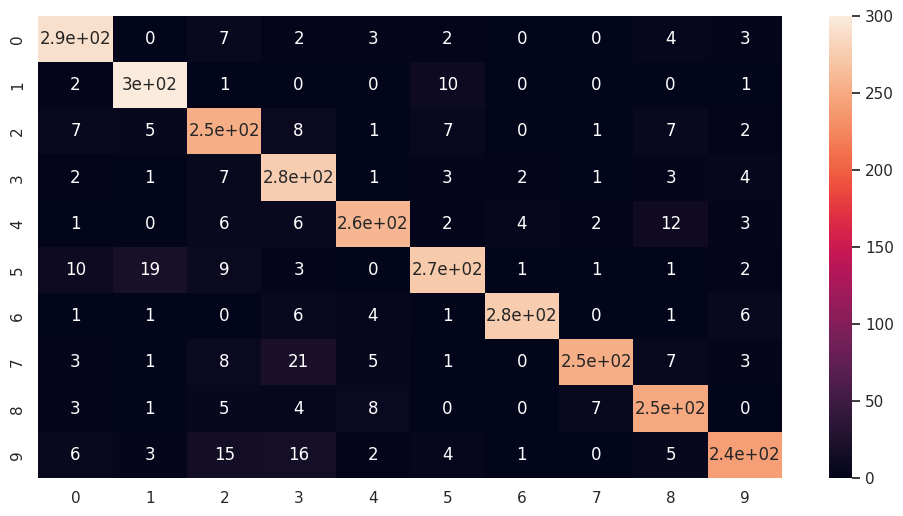

In [16]:
print("Training set score: {:.3f}".format(knn_cls.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn_cls.score(X_test, y_test)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize': (12, 6)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test, y_pred))


Training set score: 0.919
Test set score: 0.845
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       312
           1       0.88      0.96      0.92       314
           2       0.81      0.80      0.80       291
           3       0.78      0.80      0.79       300
           4       0.92      0.80      0.86       294
           5       0.87      0.88      0.88       320
           6       0.89      0.91      0.90       295
           7       0.89      0.88      0.89       302
           8       0.80      0.85      0.83       276
           9       0.75      0.71      0.73       293

    accuracy                           0.84      2997
   macro avg       0.84      0.84      0.84      2997
weighted avg       0.85      0.84      0.84      2997



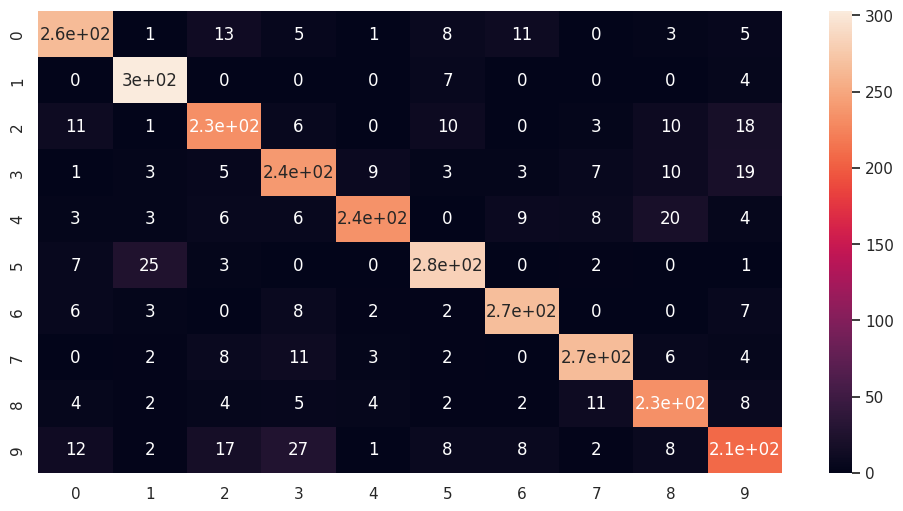

In [17]:
# SVM
from sklearn.svm import SVC

svm_cls = SVC(kernel='rbf', degree=8)
svm_cls.fit(X_train, y_train)

print("Training set score: {:.3f}".format(svm_cls.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_cls.score(X_test, y_test)))

y_pred = svm_cls.predict(X_test)

cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize': (12, 6)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))


### Music Genre Classification - Simple Feed Forward Neural Network

In [36]:
import os
import numpy as np

import torch
from torch import nn, optim
from torch.functional import F
from torch.utils.data import DataLoader, TensorDataset

In [37]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.fc6(x)
        return x

In [38]:
input_size = X_train.shape[1]
model = MLP(input_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000146)

In [39]:
num_epochs = 300
batch_size = 256

train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

step = 0

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if step % 100 ==0:
          print(f"Step {step}, Train Loss: {loss.item():.4f}")
        step += 1

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Step 0, Train Loss: 2.3179
Epoch 1/300, Validation Loss: 2.2885, Validation Accuracy: 10.54%
Epoch 2/300, Validation Loss: 2.2029, Validation Accuracy: 21.89%
Epoch 3/300, Validation Loss: 1.9482, Validation Accuracy: 35.57%
Step 100, Train Loss: 1.9059
Epoch 4/300, Validation Loss: 1.7137, Validation Accuracy: 35.87%
Epoch 5/300, Validation Loss: 1.5899, Validation Accuracy: 39.31%
Epoch 6/300, Validation Loss: 1.5127, Validation Accuracy: 42.24%
Epoch 7/300, Validation Loss: 1.4416, Validation Accuracy: 46.58%
Step 200, Train Loss: 1.5910
Epoch 8/300, Validation Loss: 1.3760, Validation Accuracy: 48.95%
Epoch 9/300, Validation Loss: 1.3190, Validation Accuracy: 51.15%
Epoch 10/300, Validation Loss: 1.2699, Validation Accuracy: 53.42%
Step 300, Train Loss: 1.3648
Epoch 11/300, Validation Loss: 1.2362, Validation Accuracy: 54.49%
Epoch 12/300, Validation Loss: 1.1914, Validation Accuracy: 56.36%
Epoch 13/300, Validation Loss: 1.1615, Validation Accuracy: 57.52%
Epoch 14/300, Validation

Expected Index: [8 7 7 ... 7 0 9], Predicted Index: [8 7 7 ... 7 0 9]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       312
           1       0.95      0.96      0.96       314
           2       0.85      0.89      0.87       291
           3       0.87      0.84      0.85       300
           4       0.91      0.88      0.90       294
           5       0.93      0.94      0.93       320
           6       0.95      0.94      0.94       295
           7       0.91      0.91      0.91       302
           8       0.87      0.91      0.89       276
           9       0.86      0.83      0.84       293

    accuracy                           0.90      2997
   macro avg       0.90      0.90      0.90      2997
weighted avg       0.90      0.90      0.90      2997



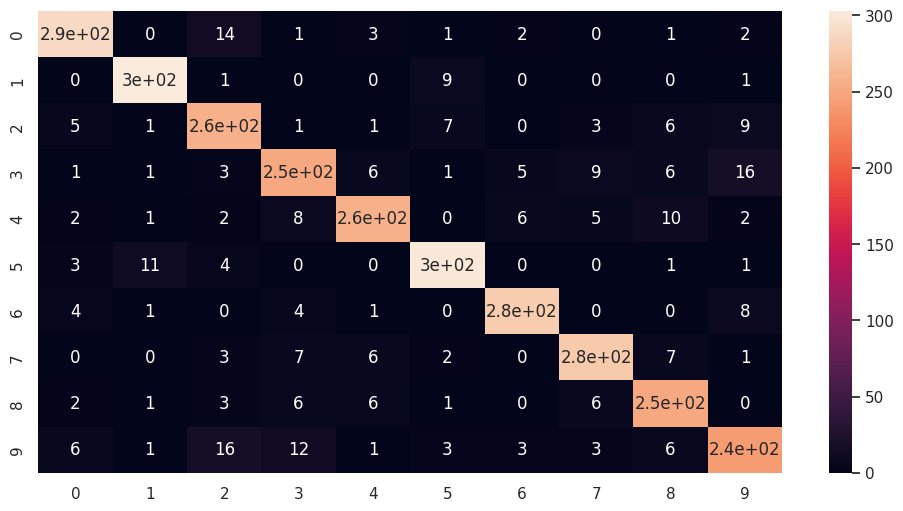

In [40]:
# Sample testing
model.eval()
with torch.no_grad():
    predictions = model(torch.tensor(X_test).float())
    _, predicted_indices = predictions.max(1)
    print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_indices.numpy()))

# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
import seaborn as sns

y_pred = predicted_indices.numpy()
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test, y_pred))